# Example of cluster analysis: market segmentation

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.cluster import KMeans

## Load the data

In [3]:
data = pd.read_csv("3.12.Example.csv")
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot the data

<function matplotlib.pyplot.show(close=None, block=None)>

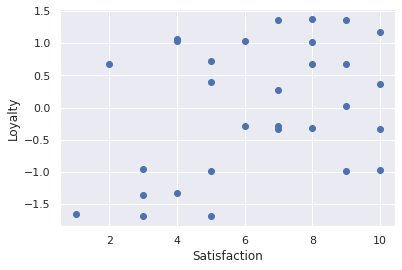

In [4]:
plt.scatter(data["Satisfaction"], data["Loyalty"])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show

## Clustering

In [5]:
x = data.copy()

kmeans = KMeans(2)  # Here we define the method for clustering or define the model.
kmeans.fit(x)       # Here we fit our data using the model.


KMeans(n_clusters=2)

In [9]:
cluster = x.copy()
cluster["cluster_pred"] = kmeans.fit_predict(x)

<function matplotlib.pyplot.show(close=None, block=None)>

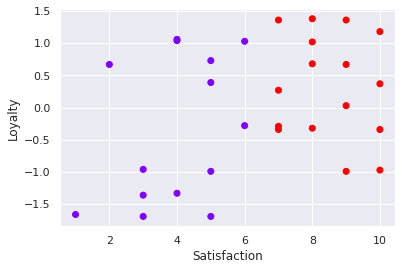

In [10]:
plt.scatter(cluster["Satisfaction"], cluster["Loyalty"], c = cluster["cluster_pred"], cmap = "rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show

In [11]:
# It looks that the model took Satisfaction as the leading feature, because it has bigger values.
# Loyalty is standardized, and to treat both features eqaully important we need to standardize Satisfaction.

## Standardize variables

In [13]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Elbow method

In [14]:
wcss = []   # Declare an empty list.

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[59.99999999999999,
 29.818973034723143,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.569489487091781,
 5.363006425346784,
 4.6521370539261575,
 3.8105958856570354]

<function matplotlib.pyplot.show(close=None, block=None)>

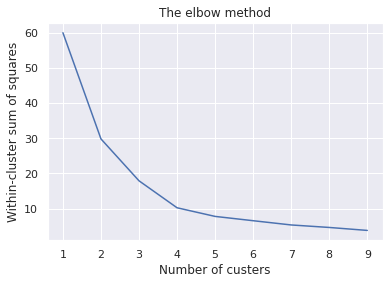

In [21]:
number_clusters = range(1,10)
plt.plot(number_clusters, wcss)
plt.title("The elbow method")
plt.xlabel("Number of custers")
plt.ylabel("Within-cluster sum of squares")

plt.show

In [ ]:
# Note that we need to check our solutions for N=2,3,4,5 which look reasonable.

## Explore cluster solutions and select number of clusters

In [19]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new["cluster_pred"] = kmeans_new.fit_predict(x_scaled)

cluster_new

# We keep here the original data, but for the last column (predictions) we choose the standardized data.

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,3
2,5,-0.99,0
3,7,-0.29,3
4,4,1.06,2
5,1,-1.66,0
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,1
9,8,0.68,1


<function matplotlib.pyplot.show(close=None, block=None)>

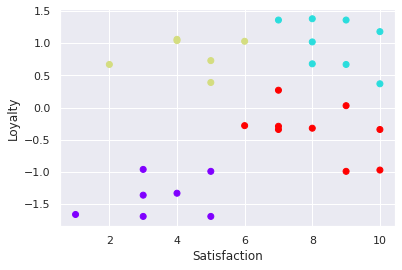

In [20]:
plt.scatter(cluster_new["Satisfaction"], cluster_new["Loyalty"], c = cluster_new["cluster_pred"], 
            cmap = "rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show

In [ ]:
# It looks that for K=4 or 5 we get the best segmentation showing the types of customers.